In [1]:
import numpy as np
import numba
import therpy as tp
import matplotlib.pyplot as plt
%matplotlib inline
import line_profiler

# Non-Uniform Grid

In [12]:
# Linear Approximation at specified points 
def numder_linear_appx(x, y, Dx, xp):
    yp = np.zeros_like(xp)
    for i, xpi in enumerate(xp):
        use_index = (x >= xpi - Dx/2) & (x < xpi + Dx/2)
        if sum(use_index) >= 2:
            p = np.poly1d(np.polyfit(x[use_index], y[use_index], deg=1))
            yp[i] = np.polyder(p)(xpi)
        else:
            yp[i] = np.nan
    return yp

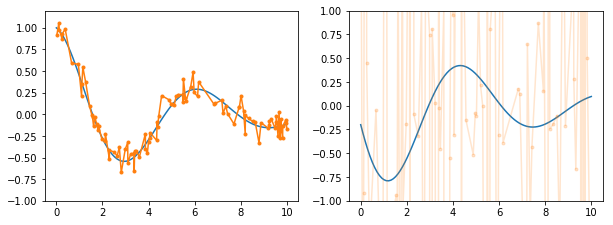

In [20]:
# Random data to work with 

# Real data
x = np.linspace(0, 10, 100)
y = np.cos(x) * np.exp(-0.2 * x)
curve_real = tp.Curve(x, y)

# True derivative
y = - np.sin(x) * np.exp(-0.2 * x) + np.cos(x) * np.exp(-0.2 * x) * (- 0.2)
curve_real_diff = tp.Curve(x, y)

# Add noise to x and y
x = np.sort(np.random.uniform(0, 10, 100))
y = np.cos(x) * np.exp(-0.2 * x) + np.random.normal(scale=0.1, size=x.size)
curve_data = tp.Curve(x, y)
curve_data_simple_diff = tp.Curve(x[0:-1], np.diff(y)/np.diff(x))


# Plots
fig, ax = plt.subplots(ncols = 2, figsize=(10,3.5))
ax[0].plot(*curve_real.plotdata)
ax[0].plot(*curve_data.plotdata,'.-')
ax[0].set(ylim=(-1,1.2))
ax[1].plot(*curve_real_diff.plotdata)
ax[1].plot(*curve_data_simple_diff.plotdata,'.-',alpha=0.2)
ax[1].set(ylim=(-1,1));

[(-1, 1)]

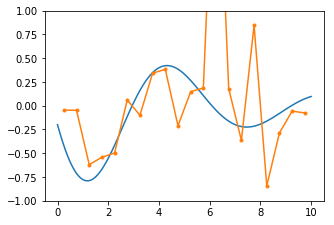

In [21]:
# Simple Linear Apprx Derivative 
x, y = curve_data.x, curve_data.y
Dx = 0.5
xp = np.arange(Dx/2, 10, Dx)
yp = numder_linear_appx(x, y, Dx, xp)

c_linder = tp.Curve(xp, yp)

# plot
fig, ax = plt.subplots(ncols = 1, figsize=(5,3.5))
ax.plot(*curve_real_diff.plotdata)
ax.plot(*c_linder.plotdata,'.-')
ax.set(ylim=[-1,1])

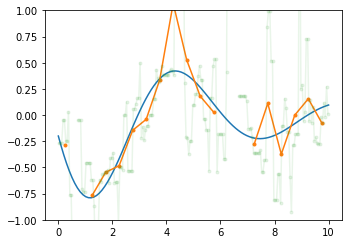

In [22]:
# Running average 
Dx = 0.5
avg = 10
x, y = curve_data.x, curve_data.y
xp_all = np.arange(Dx/avg/2,10,Dx/avg)
yp_all = numder_linear_appx(x, y, Dx, xp_all)

curve_linder_running = tp.Curve(xp_all, yp_all)
curve_linder_running_avg = curve_linder_running.subsample(bins = avg)

# plot
fig, ax = plt.subplots(ncols = 1, figsize=(5,3.5))
ax.plot(*curve_real_diff.plotdata)
ax.plot(*curve_linder_running_avg.plotdata,'.-')
ax.plot(*curve_linder_running.plotdata,'.-',alpha=0.1)
ax.set(ylim=[-1,1])
fig.tight_layout()

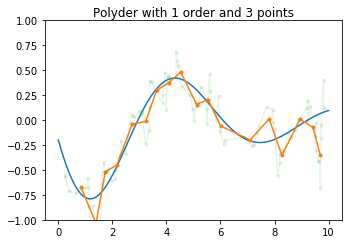

In [23]:
# Polynomial fits 
order, points = 1, 3
c_polyder = curve_data.diff(method='poly', order=order, points=points)
c_polyder_avg = c_polyder.subsample(bins=5)

# plot
fig, ax = plt.subplots(ncols = 1, figsize=(5,3.5))
ax.plot(*curve_real_diff.plotdata)
ax.plot(*c_polyder_avg.plotdata,'.-')
ax.plot(*c_polyder.plotdata, '.-', alpha=0.1)
ax.set(title='Polyder with {} order and {} points'.format(order, points))
ax.set(ylim=[-1,1])
fig.tight_layout()